In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [56]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

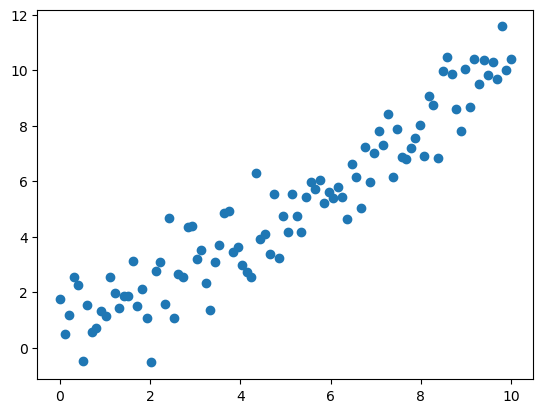

In [57]:
plt.scatter(X, y)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()

In [60]:
model.fit(X, y)
model.score(X, y)
predictions = model.predict(X)

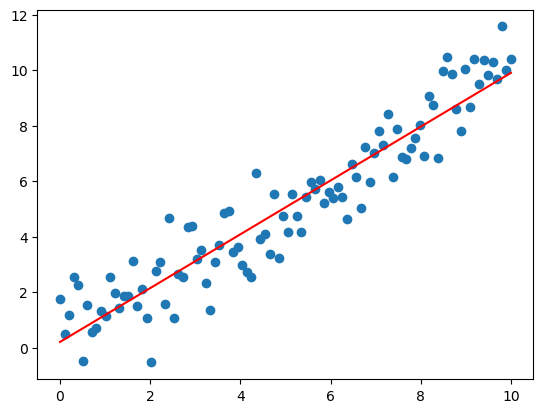

In [61]:
plt.scatter(X, y)
plt.plot(X, predictions, c='r')

In [62]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
titanic = titanic[['survived', 'pclass', 'age', 'sex']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,age,sex
0,0,3,22.0,0
1,1,1,38.0,1
2,1,3,26.0,1
3,1,1,35.0,1
4,0,3,35.0,0


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
model = KNeighborsClassifier(n_neighbors=8)

In [104]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [105]:
model.fit(X, y)
model.score(X, y)

0.8081232492997199

In [106]:
def survie(model, pclass, age, sex):
    x = np.array([pclass, age, sex]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [107]:
survie(model, 3, 23, 0)

[0]
[[0.875 0.125]]


/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [108]:
def best_model():
    best = 0
    for i in range(1, 268):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X, y)
        score = model.score(X, y)
        if score > best:
            best = score
            best_k = i
    return best, best_k

In [109]:
best_model()

(0.834733893557423, 4)